In [ ]:
import numpy as np
import pandas as pd
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc("figure", figsize=(10, 6))
plt.rcParams["font.family"] = 'Malgun Gothic'

# 11장 시계열(time series)
* 금융, 경제, 생태학, 신경 과학, 서버 로그 데이터 분석 등 분야에서 사용되는 구조화된 데이터
* 시간상의 여러 지점을 관측하거나 측정할수 있는 모든 것
* 시간 내에서 특정 순간의 타임스탬프로 색인된 데이터

## 1. datetime 모듈의 자료형
* from datetime import datetime
* datetime: 날짜와 시간을 함께 나타내는 자료형
* date: 날짜(연, 월, 일)만을 나타내는 자료형
* time: 시간(hour, minute, second)만을 나타내는 자료형
* timedelta: 두 날짜 또는 시간 사이의 차이를 나타내는 자료형

## 2. datetime의 속성
* year: 년도
* month: 월
* day: 일
* hour: 시간
* minute: 분
* second: 초
* microsecond: 마이크로초

## 3. datetime 자료형의 메서드
* datetime()
* now(): 현재 날짜와 시간을 반환
* today(): 오늘 날짜를 반환

In [ ]:
# ex 1 : 사용법
from datetime import datetime
now = datetime.now()
print(now)

In [ ]:
# ex2 : datetime 객체에서 연, 월, 일 정보 추출(!!!!)
print(now.year)

## 4. timedelta 자료형의 속성
* days: 일
* seconds: 초
* microseconds: 마이크로초

In [ ]:
delta =  datetime.now() - datetime(2024, 1, 1)
print(delta.days)

## 5. datetime 포맷 규칙
* %Y: 년도 (4자리)
* %m: 월 (2자리)
* %d: 일 (2자리)
* %H: 시간 (24시간제, 2자리)
* %M: 분 (2자리)
* %S: 초 (2자리)


In [ ]:
#ex1> datetime객체 -> 문자열 datetime 객체로 변환
stamp = datetime(2024, 5, 6)

date = stamp.strftime("%Y/%m/%d")
print(date)

## 6. 시계열 데이터 프레임
* datetime 객체로 표현되는 타임스템프로 색인된 DataFrame
* 시계열 색인을 이용한 데이터 색인, 선택, 부분 선택
* groupby()을 이용한 데이터 그룹화 하기

In [ ]:
# ex> DatetimeIndex 객체 생성하기
## 날짜 문자열 리스트 -> datetime 객체으로 파싱
datestrs = ["2011-07-06 12:00:00", "2011-08-06 00:00:00"] # list of datetime strings
dt = pd.to_datetime(datestrs)
print(dt) # DatetimeIndex 객체(중요!!)

### [실습] 가상 시계열 데이터 생성
* pandas.date_range()
  * range(start,end, step)와 유사
  * pandas 라이브러리의 함수로, 특정 기간 내의 날짜 범위를 생성
  * start: 시작 날짜
  * end: 종료 날짜
  * periods: 생성할 날짜 수
  * freq: 날짜 간격 (기본값: 'D' (하루))

In [11]:
# 1. 시계열 데이터프레임 생성
np.random.seed(1)

#1). DateTimeIndex 생성
dates = pd.date_range("2000-01-01", periods=10, freq="w-WED")

# 2). DateFrame 생성
long_df = pd.DataFrame(np.random.standard_normal((10, 4)),
                       index=dates,
                       columns=["Colorado", "Texas",
                                "New York", "Ohio"])
long_df

# 2. 데이터프레임 탐색
# 1) 인덱싱
long_df.loc["2000-01"]
# 2) 슬라이싱
long_df.iloc[:5:2]

,Colorado,Texas,New York,Ohio
2000-01-05,1.624345,-0.611756,-0.528172,-1.072969
2000-01-12,0.865408,-2.301539,1.744812,-0.761207
2000-01-19,0.319039,-0.249370,1.462108,-2.060141
2000-01-26,-0.322417,-0.384054,1.133769,-1.099891


In [12]:
# 3) DatetimeIndex 에서 년, 월, 일 추출확인
long_df.index
 
long_df.index.year

DatetimeIndex(['2000-01-05', '2000-01-12', '2000-01-19', '2000-01-26',
               '2000-02-02', '2000-02-09', '2000-02-16', '2000-02-23',
               '2000-03-01', '2000-03-08'],
              dtype='datetime64[ns]', freq='W-WED')

In [ ]:
# 4) # 시계열 색인을 기준으로 시계열 데이터프레임 그룹핑하기
grouped = long_df.groupby(level=0) 
# 각 그룹별 이름과 데이터을 출력
for n, g in grouped:
  print(f"name : {n}")
  print(g)
  print()


In [ ]:
# groupby()에 의한 메서드 : count(), size(), sum(), mean(), std() ...
grouped.count()


## [실습] 시계열 데이터셋 로딩

In [15]:
# 시계열 데이터셋 파일 -> 시계열 색인을 갖는 데이터프레임 객체로 변환
# 단일 데이터프레임의 첫 번째 시계열 컬럼 -> DatetimeIndex 생성

close_px_all = pd.read_csv("examples/stock_px.csv", parse_dates= True, index_col= 0)


In [ ]:
close_px_all.columns  # AAPL: Apple Inc, MSFT: Microsoft Corporation, XOM: Exxon Mobil Corporation, SPX: S&P 500 Index


In [16]:
# 인덱싱
close_px = close_px_all[["AAPL", "MSFT", "XOM"]]



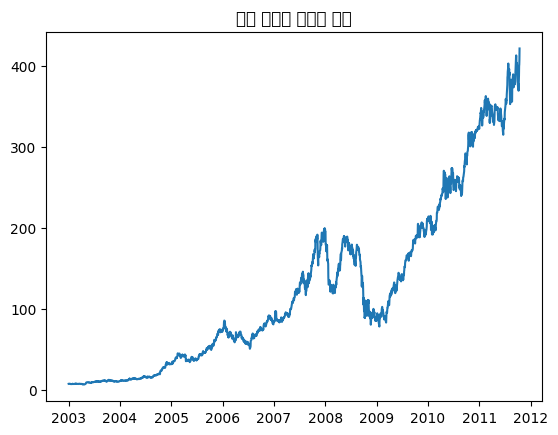

In [24]:
# 시각화 방법 : line plots
import matplotlib.pyplot as plt
plt.figure()
plt.plot(close_px["AAPL"]) #close_px["AAPL"].plot(kind='line')
plt.title("애플 주가의 연도별 평균")
plt.show()

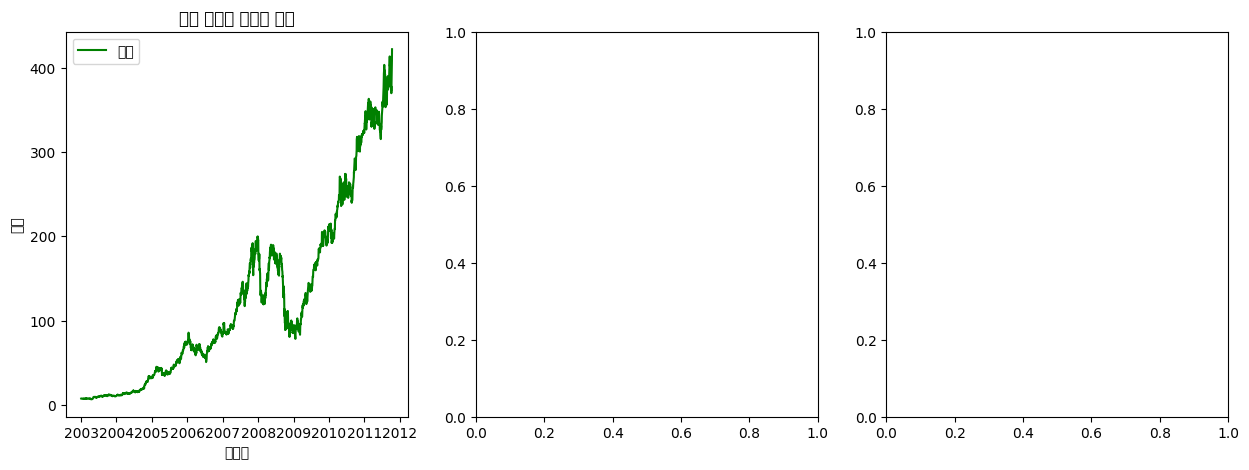

In [25]:
# 하나의 도화지에 세 종류의 그래프 그리기
fig, axes = plt.subplots(1,3, figsize=(15, 5))

axes[0].plot(close_px["AAPL"], color="green", label="애플")


axes[0].set_title("애플 주가의 연도별 평균")

axes[0].set_xlabel("연도별")

axes[0].set_ylabel("평균")


axes[0].legend()


plt.show()

### < pandas.rolling() 메서드>!!!!!!
* pandas 라이브러리의 함수로, 특정 기간 동안의 데이터를 그룹화하여 통계를 계산
* 롤링창(이동 창)을 사용하여 데이터 변화 추세, 변동성 측정, 이상치 감지, 예측에 사용
* rolling(일의 개수)을 사용하여 일의 크기의 움직이는 창을 통해 그룹핑할 수 있는 객체를 생성
* 일별 평균, 표준편차, 최대값/최소값, 회귀분석 등
* rolling() 함수의 인자:
  * window: 그룹화할 데이터의 수
  * min_periods: 계산에 포함할 최소 데이터 수 (기본값: window)
  * center: 그룹화할 데이터의 중심을 맞출지 여부 (기본값: False)
  


C:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50528 (\N{HANGUL SYLLABLE AE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54540 (\N{HANGUL SYLLABLE PEUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: Us

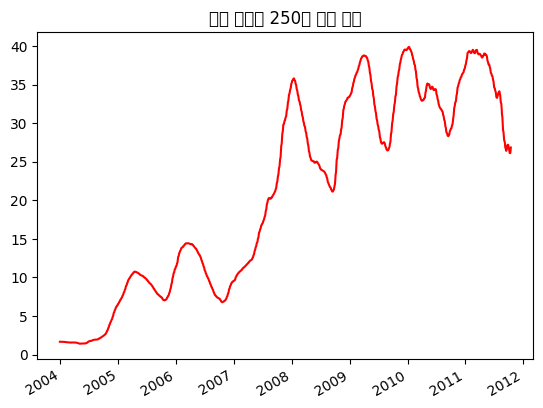

In [36]:
# 롤링창 만들어 일별 수익 통계 계산 - 1 개의 주가에 대한 250일 일별 수익 표준편차의 그래프

# (1)  DataFrame의 "AAPL" 열에 대한 rolling() 메서드를 사용하여 250일 크기의 롤링 창을 만들기
close_px["AAPL"].rolling(250).std()

# (2)  그래프 그리기
plt.figure() # 도화지 1개에 그림 1개 그리기

close_px["AAPL"].rolling(250).std().plot(kind = "line", color = "red")
plt.title("애플의 250일 일별 수익 표준편차")
plt.show()


C:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: User

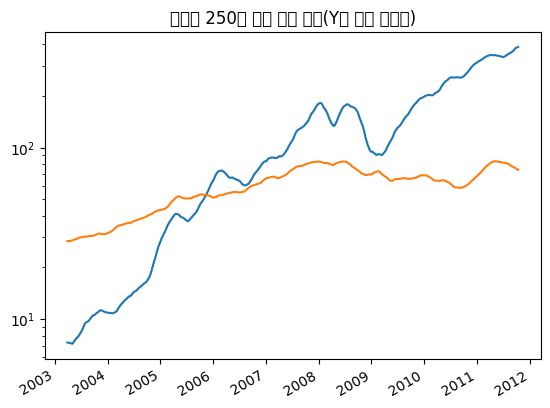

In [39]:
# (2) 롤링창 만들어 통계 계산 - 2 개의 종가에 대한 250일 롤링 평균 계산
plt.figure()
close_px["AAPL"].rolling(window = 60).mean().plot(logy = True)
close_px["XOM"].rolling(window = 60).mean().plot(logy = True)
plt.title("주가의 250일 일별 이동 평균(Y축 로그 스케일)")
plt.show()


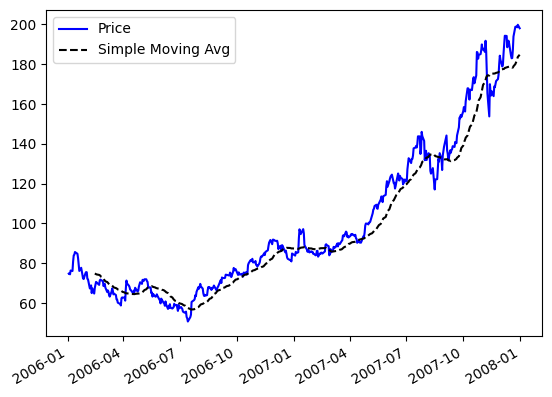

In [40]:
# # Create a figure
plt.figure()
# Select the desired date range for AAPL stock prices
aapl_px = close_px["AAPL"]["2006":"2007"]
# Calculate the 30-day simple moving average
ma30 = aapl_px.rolling(30).mean()
# Plot the AAPL stock prices : sets the line style to solid (-) and the color to blue (b).
aapl_px.plot(style="b-", label="Price")
# Plot the 30-day simple moving average
ma30.plot(style="k--", label="Simple Moving Avg")
plt.legend()
plt.show()